In [1]:
!pip install imblearn seaborn matplotlib scikit-learn pandas --quiet

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from imblearn.over_sampling import SMOTE

In [2]:
df = pd.read_csv("/content/data.csv")
print("Dataset shape:", df.shape)
print("\nInfo:")
print(df.info())
print("\nDescribe numeric features:")
print(df.describe())
print("\nMissing values per column:")
print(df.isnull().sum())

Dataset shape: (1242, 11)

Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1242 entries, 0 to 1241
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   tech_company            1242 non-null   object 
 1   benefits                1242 non-null   object 
 2   workplace_resources     1242 non-null   object 
 3   mh_employer_discussion  1242 non-null   object 
 4   mh_coworker_discussion  1242 non-null   object 
 5   medical_coverage        1242 non-null   object 
 6   mental_health           1242 non-null   object 
 7   mh_share                1242 non-null   int64  
 8   age                     1242 non-null   float64
 9   gender                  1242 non-null   object 
 10  country                 1242 non-null   object 
dtypes: float64(1), int64(1), object(9)
memory usage: 106.9+ KB
None

Describe numeric features:
          mh_share          age
count  1242.000000  1242.000000
mean      

In [3]:
df['gender'] = df['gender'].str.lower()
df['gender'] = df['gender'].replace({
    'male': 'male', 'm': 'male',
    'female': 'female', 'f': 'female',
    'other': 'other', 'non-binary': 'other',
    'genderqueer': 'other', 'trans': 'other', 'fluid': 'other'
})

In [4]:
le = LabelEncoder()
for col in ['tech_company','benefits','workplace_resources','mh_employer_discussion',
            'mh_coworker_discussion','medical_coverage','mental_health','gender','country']:
    df[col] = le.fit_transform(df[col])

In [5]:
df['career_uncertainty'] = df['mh_share'].apply(lambda x: 1 if x >= 7 else 0)
print("\nCareer Uncertainty Distribution:")
print(df['career_uncertainty'].value_counts())


Career Uncertainty Distribution:
career_uncertainty
1    722
0    520
Name: count, dtype: int64


Since both classes of the novel label (‘career_identity_uncertainty’) were relatively balanced (58% vs 42%), augmentation techniques such as SMOTE were not required. The dataset was sufficient for baseline ML evaluation without synthetic balancing.

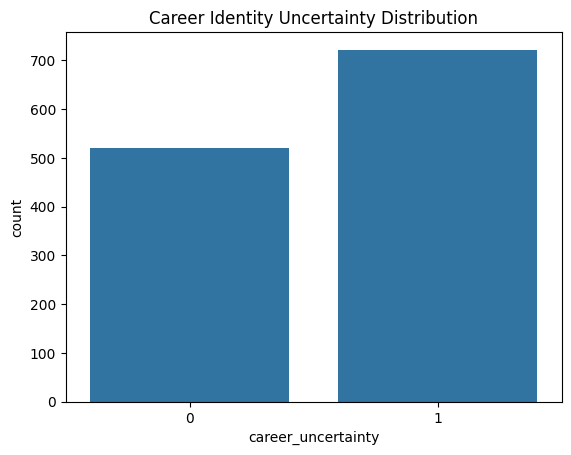

In [6]:
sns.countplot(x='career_uncertainty', data=df)
plt.title("Career Identity Uncertainty Distribution")
plt.show()

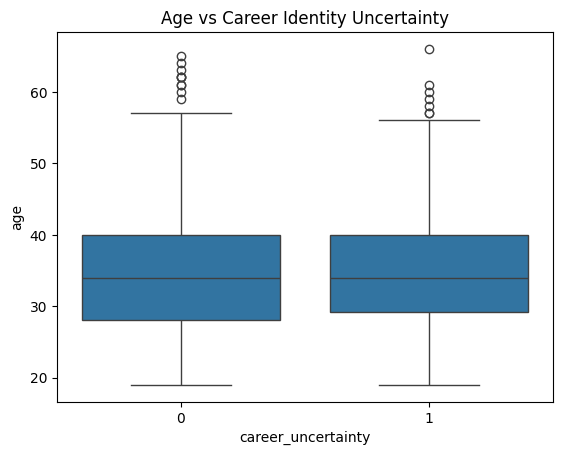

In [7]:
sns.boxplot(x='career_uncertainty', y='age', data=df)
plt.title("Age vs Career Identity Uncertainty")
plt.show()

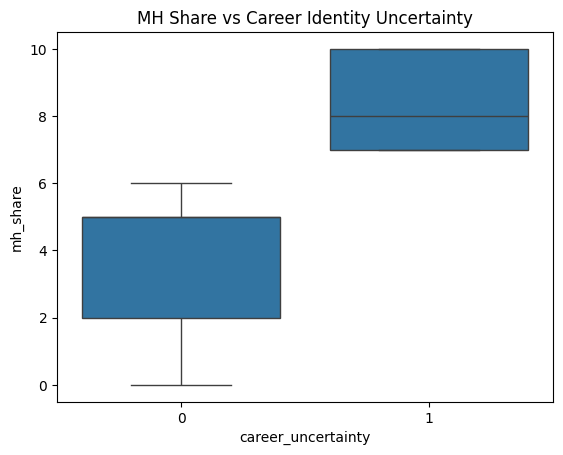

In [8]:
sns.boxplot(x='career_uncertainty', y='mh_share', data=df)
plt.title("MH Share vs Career Identity Uncertainty")
plt.show()

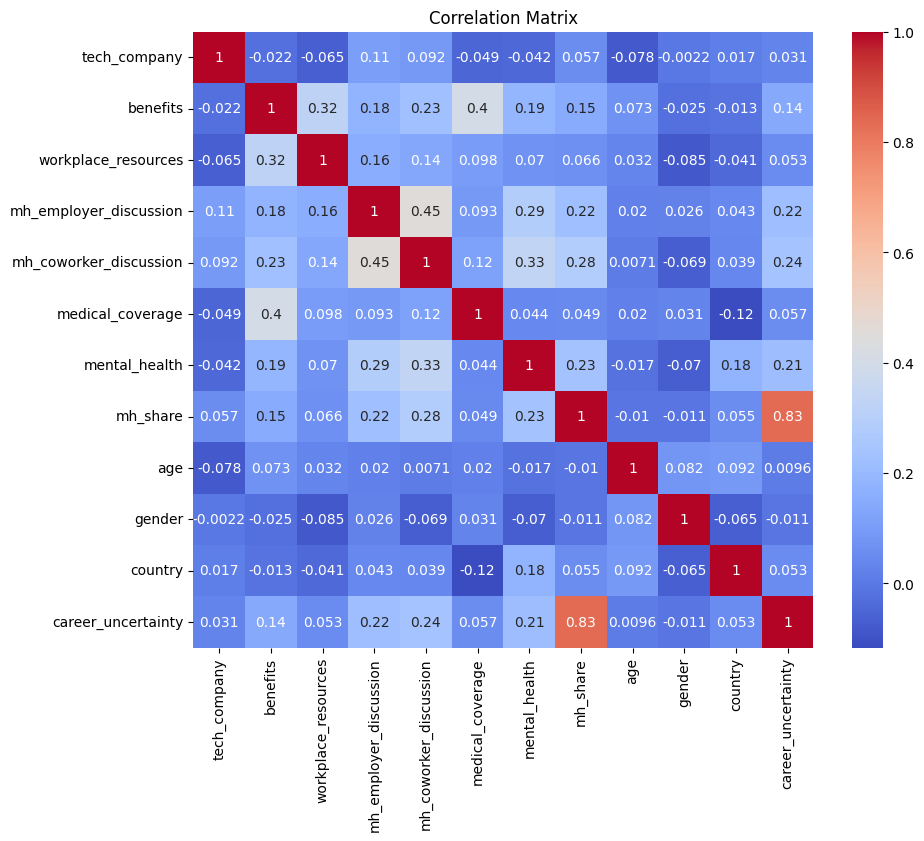

In [9]:
corr = df.corr()
plt.figure(figsize=(10,8))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()

In [10]:
X = df.drop(['career_uncertainty', 'mh_share'], axis=1)  # drop label + derived column
y = df['career_uncertainty']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a simple baseline model
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# Evaluate
print("\n---Baseline Model Performance---")
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))


---Baseline Model Performance---
Accuracy: 0.6144578313253012
              precision    recall  f1-score   support

           0       0.51      0.49      0.50        97
           1       0.68      0.69      0.69       152

    accuracy                           0.61       249
   macro avg       0.59      0.59      0.59       249
weighted avg       0.61      0.61      0.61       249



In [11]:
importances = model.feature_importances_
feat_imp = pd.DataFrame({'feature': X.columns, 'importance': importances})
feat_imp = feat_imp.sort_values(by='importance', ascending=False)
print("\nFeature Importance:")
print(feat_imp)


Feature Importance:
                  feature  importance
7                     age    0.404143
6           mental_health    0.118962
9                 country    0.097753
2     workplace_resources    0.086271
1                benefits    0.063560
8                  gender    0.062632
0            tech_company    0.052691
4  mh_coworker_discussion    0.047536
3  mh_employer_discussion    0.044978
5        medical_coverage    0.021473


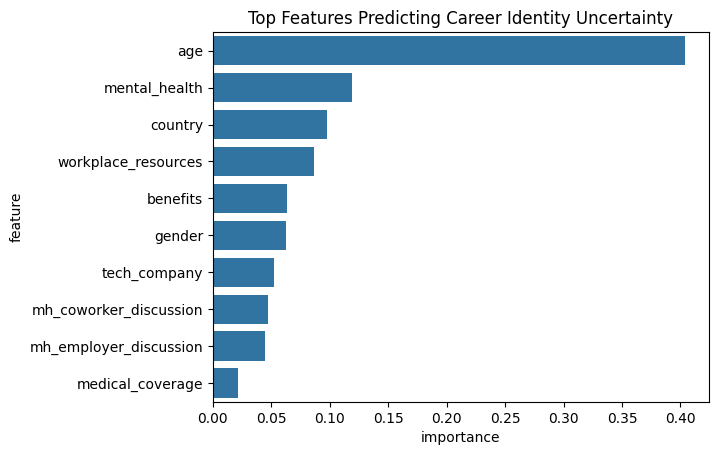

In [12]:
sns.barplot(x='importance', y='feature', data=feat_imp.head(10))
plt.title("Top Features Predicting Career Identity Uncertainty")
plt.show()

In [13]:
pros = [
    "Public dataset, tabular format, 1242 samples, 11 features",
    "Relevant to tech industry and mental health (CS student / workplace relevance)",
    "No missing values → easy preprocessing"
]

cons = [
    "Moderate dataset size → simple ML models recommended",
    "Self-reported → may have bias",
    "Novel label is derived → not original survey measurement"
]

uniqueness = [
    "Defining 'career-identity uncertainty' is a novel spin",
    "Feature importance + ML baseline + EDA offers new insight for tech students / mental health",
    "Can combine multiple years of surveys for richer analysis if needed"
]

print("\nPros of Dataset:", pros)
print("\nCons of Dataset:", cons)
print("\nUniqueness / Novelty:", uniqueness)


Pros of Dataset: ['Public dataset, tabular format, 1242 samples, 11 features', 'Relevant to tech industry and mental health (CS student / workplace relevance)', 'No missing values → easy preprocessing']

Cons of Dataset: ['Moderate dataset size → simple ML models recommended', 'Self-reported → may have bias', 'Novel label is derived → not original survey measurement']

Uniqueness / Novelty: ["Defining 'career-identity uncertainty' is a novel spin", 'Feature importance + ML baseline + EDA offers new insight for tech students / mental health', 'Can combine multiple years of surveys for richer analysis if needed']
